## Laptop details dataset


In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [300]:
laptop_data = pd.read_csv("laptop_detail.csv")

In [301]:
laptop_data.info()
laptop_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


In [302]:
laptop_data.head(4)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244


In [303]:
laptop_data = laptop_data.drop(laptop_data.columns[0],axis=1)

In [304]:
laptop_data.head(3)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946


In [305]:
laptop_data.isnull().sum().to_frame().rename(columns={0:'total number of missing values'})

,total number of missing values
Manufacturer,0
Category,0
Screen,0
GPU,0
OS,0
CPU_core,0
Screen_Size_cm,4
CPU_frequency,0
RAM_GB,0
Storage_GB_SSD,0


In [306]:
laptop_data = laptop_data.dropna()
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    229 non-null    object 
 1   Category        229 non-null    int64  
 2   Screen          229 non-null    object 
 3   GPU             229 non-null    int64  
 4   OS              229 non-null    int64  
 5   CPU_core        229 non-null    int64  
 6   Screen_Size_cm  229 non-null    float64
 7   CPU_frequency   229 non-null    float64
 8   RAM_GB          229 non-null    int64  
 9   Storage_GB_SSD  229 non-null    int64  
 10  Weight_kg       229 non-null    float64
 11  Price           229 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 23.3+ KB


In [307]:
print("Duplicated Values: ", laptop_data.duplicated().sum())

Duplicated Values:  0


In [308]:
laptop_data['Manufacturer'].unique()

array(['Acer', 'Dell', 'HP', 'Asus', 'Lenovo', 'Huawei', 'Toshiba', 'MSI',
       'Razer', 'Samsung', 'Xiaomi'], dtype=object)

# EXPLORATORY DATA ANALYSIS


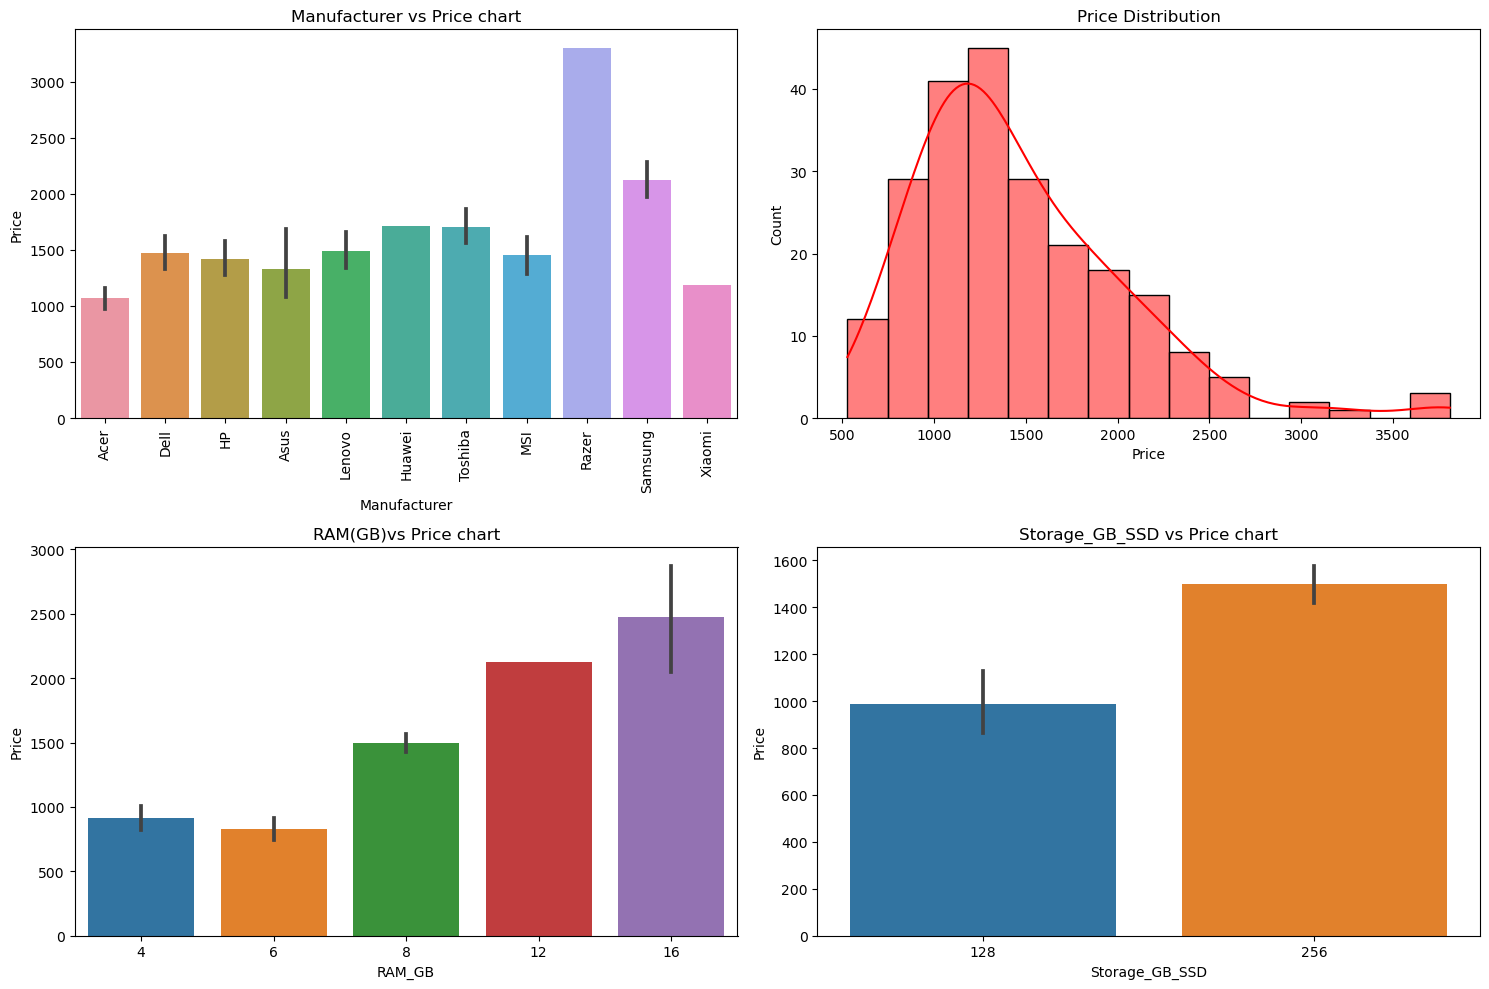

In [309]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.barplot(x='Manufacturer',y='Price',data=laptop_data)
plt.title("Manufacturer vs Price chart")
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.histplot(laptop_data['Price'],color='red',kde=True)
plt.title("Price Distribution")

plt.subplot(2,2,3)
sns.barplot(x='RAM_GB',y='Price',data=laptop_data)
plt.title("RAM(GB)vs Price chart")

plt.subplot(2,2,4)
sns.barplot(x='Storage_GB_SSD',y='Price',data=laptop_data)
plt.title("Storage_GB_SSD vs Price chart")

plt.tight_layout()

Text(0.5, 1.0, 'Weight vs Price chart')

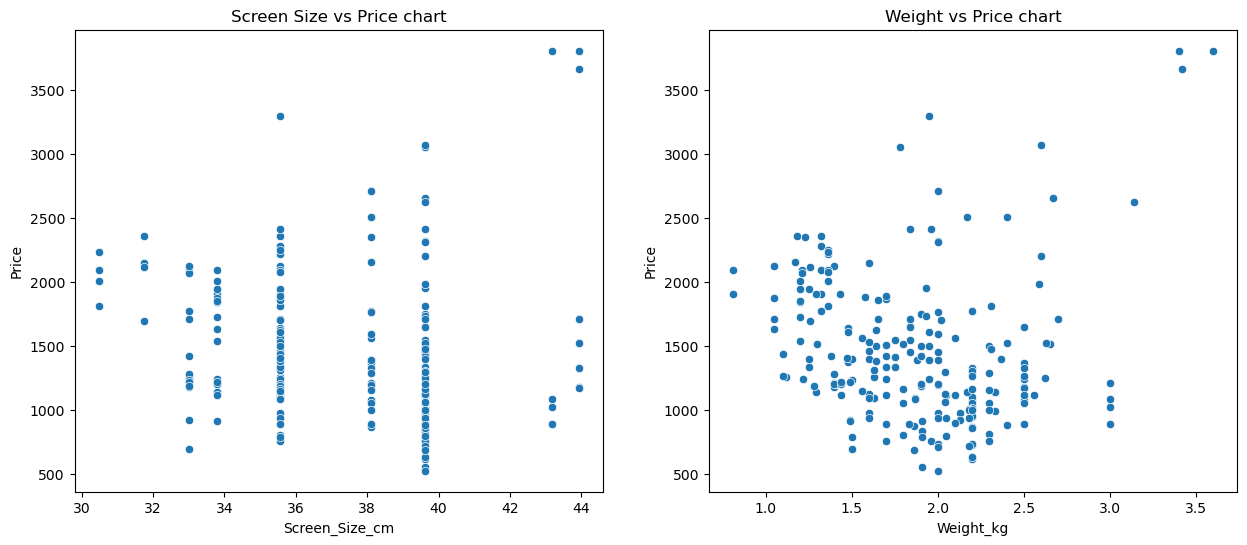

In [310]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Screen_Size_cm',y='Price',data=laptop_data)
plt.title("Screen Size vs Price chart")

plt.subplot(1,2,2)
sns.scatterplot(x='Weight_kg',y='Price',data=laptop_data)
plt.title("Weight vs Price chart")

<Axes: >

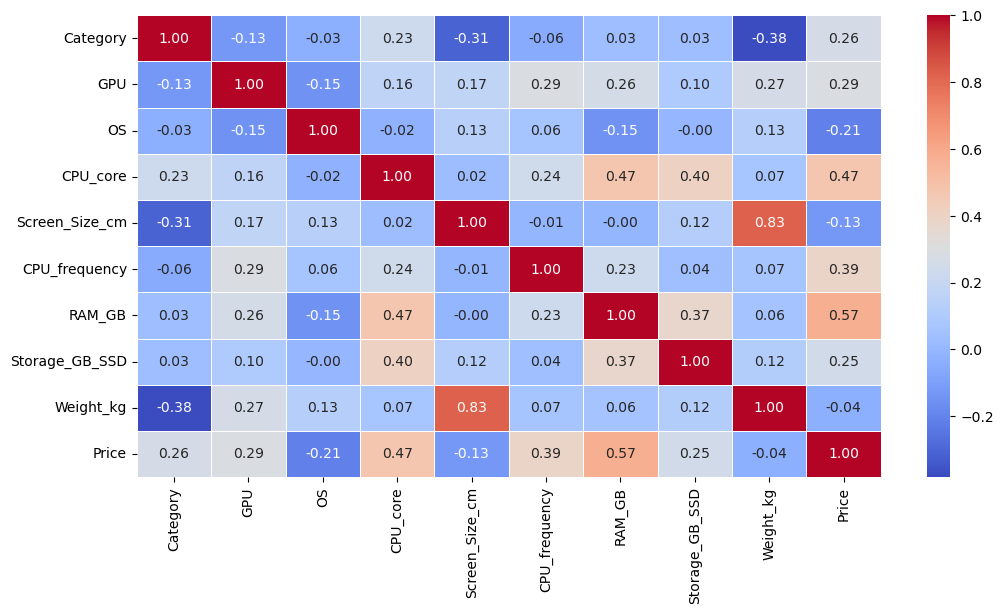

In [311]:
numeric_columns =  laptop_data.select_dtypes(include=['int','float'])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12,6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Data Preprocessing 

In [312]:
laptop_data = pd.get_dummies(laptop_data, columns = ['Manufacturer','Screen'], dummy_na=False)
# Convert True/False values to 0/1
laptop_data = laptop_data.astype(int)
laptop_data.head()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,...,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Xiaomi,Screen_Full HD,Screen_IPS Panel
0,4,2,1,5,35,1,8,256,1,978,...,0,0,0,0,0,0,0,0,0,1
1,3,1,1,3,39,2,4,256,2,634,...,0,0,0,0,0,0,0,0,1,0
2,3,1,1,7,39,2,8,256,2,946,...,0,0,0,0,0,0,0,0,1,0
3,4,2,1,5,33,1,8,128,1,1244,...,0,0,0,0,0,0,0,0,0,1
4,4,2,1,7,39,1,8,256,1,837,...,1,0,0,0,0,0,0,0,1,0


In [313]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_columns = ['Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_cm', 
               'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_kg', 'Price']

laptop_data[num_columns] =  scaler.fit_transform(laptop_data[num_columns])
laptop_data.head()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,...,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Xiaomi,Screen_Full HD,Screen_IPS Panel
0,1.050395,-0.247565,-0.235159,-0.497368,-0.604713,-1.868207,0.053442,0.300793,-0.770300,-0.838468,...,0,0,0,0,0,0,0,0,0,1
1,-0.242833,-1.822350,-0.235159,-2.101554,0.762984,0.535273,-1.578322,0.300793,0.959099,-1.438841,...,0,0,0,0,0,0,0,0,1,0
2,-0.242833,-1.822350,-0.235159,1.106818,0.762984,0.535273,0.053442,0.300793,0.959099,-0.894317,...,0,0,0,0,0,0,0,0,1,0
3,1.050395,-0.247565,-0.235159,-0.497368,-1.288562,-1.868207,0.053442,-3.324550,-0.770300,-0.374227,...,0,0,0,0,0,0,0,0,0,1
4,1.050395,-0.247565,-0.235159,1.106818,0.762984,-1.868207,0.053442,0.300793,-0.770300,-1.084551,...,1,0,0,0,0,0,0,0,1,0


In [314]:
X = laptop_data.drop(['Price'],axis=1)
y = laptop_data["Price"]

X.info()
y.info()


<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 237
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              229 non-null    float64
 1   GPU                   229 non-null    float64
 2   OS                    229 non-null    float64
 3   CPU_core              229 non-null    float64
 4   Screen_Size_cm        229 non-null    float64
 5   CPU_frequency         229 non-null    float64
 6   RAM_GB                229 non-null    float64
 7   Storage_GB_SSD        229 non-null    float64
 8   Weight_kg             229 non-null    float64
 9   Manufacturer_Acer     229 non-null    int32  
 10  Manufacturer_Asus     229 non-null    int32  
 11  Manufacturer_Dell     229 non-null    int32  
 12  Manufacturer_HP       229 non-null    int32  
 13  Manufacturer_Huawei   229 non-null    int32  
 14  Manufacturer_Lenovo   229 non-null    int32  
 15  Manufacturer_MSI      229 no

In [315]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

print("X_train - >  ",X_train.shape)
print("X_test - >  ",X_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

X_train - >   (206, 22)
X_test - >   (23, 22)
y_train - >   (206,)
y_test - >   (23,)


# All Model Importing

In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import r2_score


In [317]:
training_score=[]
testing_score=[]

In [318]:
def predictionusingmodel(modelname):
    modelname.fit(X_train,y_train)
    X_train_pred = modelname.predict(X_train) #to check also on training data 
    predicted_value = modelname.predict(X_test)
    a = r2_score(y_train, X_train_pred)*100
    b = r2_score(y_test,predicted_value)*100
    training_score.append(a)
    testing_score.append(b)
    
    
    print("The r2 Score of {modelname} on training data is: ", a)
    print("The r2 Score  {modelname} on testing data is: ", b)
    
    

In [319]:
predictionusingmodel(LinearRegression())

The r2 Score of {modelname} on training data is:  57.13850321830256
The r2 Score  {modelname} on testing data is:  65.17579435263306


In [320]:
predictionusingmodel(RandomForestRegressor())

The r2 Score of {modelname} on training data is:  91.43957312689369
The r2 Score  {modelname} on testing data is:  51.74224054065304


In [321]:
predictionusingmodel(GradientBoostingRegressor())

The r2 Score of {modelname} on training data is:  85.8594535662989
The r2 Score  {modelname} on testing data is:  59.086169711424134


In [322]:
predictionusingmodel(DecisionTreeRegressor())

The r2 Score of {modelname} on training data is:  96.3819399778014
The r2 Score  {modelname} on testing data is:  46.27205757780032


In [323]:
predictionusingmodel(XGBRegressor())

The r2 Score of {modelname} on training data is:  96.19380963221931
The r2 Score  {modelname} on testing data is:  53.43707508582731


In [324]:
predictionusingmodel(CatBoostRegressor(verbose=False))

The r2 Score of {modelname} on training data is:  94.09209475061574
The r2 Score  {modelname} on testing data is:  57.622250188965495


In [325]:
models = ["Linear Regression","Decision Tree","Random Forest","Gradient Boost","XGBoost","CatBoost"]

show_results = pd.DataFrame({"Algorithm":models,
                           "training_score":training_score,
                           "testing_score":testing_score})
show_results

,Algorithm,training_score,testing_score
0,Linear Regression,57.138503,65.175794
1,Decision Tree,91.439573,51.742241
2,Random Forest,85.859454,59.086170
3,Gradient Boost,96.381940,46.272058
4,XGBoost,96.193810,53.437075
5,CatBoost,94.092095,57.622250


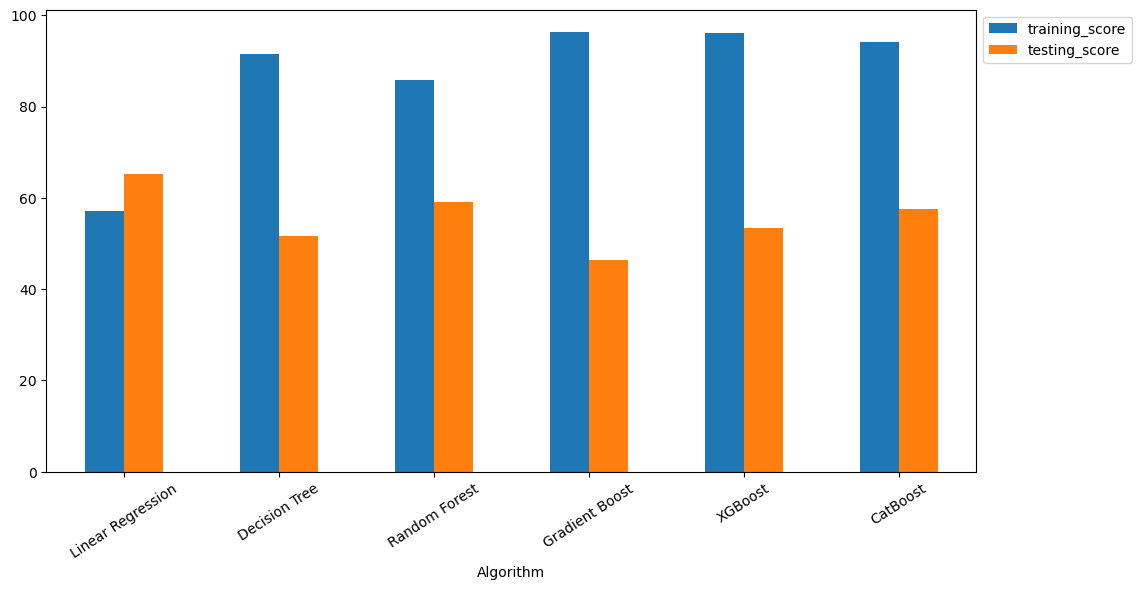

In [328]:
show_results.plot(x='Algorithm',y=['training_score','testing_score'],kind='bar',figsize=(12,6))
plt.xticks(rotation=33)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [333]:
import plotly.express as px

# Assuming 'show_results' is your DataFrame with Algorithm, Training Score, and Testing Score columns

fig = px.bar(show_results, x='Algorithm', y=['training_score', 'testing_score'],
             labels={'value': 'R2 Score (%)'},
             title='Training and Testing Scores for Different Algorithms',
             width=800, height=500)



fig.show()
